In [3]:
import pandas as pd

csv_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\matched_data_100.csv"
df = pd.read_csv(csv_path)

df["datetime"] = pd.to_datetime(df["datetime"], errors='coerce', utc=True)
df["leaving_datetime"] = pd.to_datetime(df["leaving_datetime"], errors='coerce', utc=True)


start_time = df["datetime"].min()
end_time = df["leaving_datetime"].max()

print(f"{start_time}")
print(f"{end_time}")

C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_9984\2391197018.py:4: DtypeWarning: Columns (23,44,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


2019-01-01 00:00:07+00:00
2020-11-30 23:59:43+00:00


In [4]:
min_lat = df["lat_left"].min()
max_lat = df["lat_left"].max()
min_lon = df["lng"].min()
max_lon = df["lng"].max()

print(f"lat from {min_lat} to {max_lat}")
print(f"lon from {min_lon} to {max_lon}")

lat from -37.050054 to -36.86948
lon from 174.444446 to 174.6350015


In [10]:
import xarray as xr

nc_path = r"\\tsclient\D\Siyu Zhao\data\Global Ocean Waves Reanalysis\cmems_mod_glo_wav_my_0.2deg_PT3H-i_1750893848974.nc"

ds = xr.open_dataset(nc_path)

print(ds)



<xarray.Dataset> Size: 157kB
Dimensions:    (time: 5601, latitude: 1, longitude: 1)
Coordinates:
  * time       (time) datetime64[ns] 45kB 2019-01-01 ... 2020-12-01
  * latitude   (latitude) float32 4B -37.0
  * longitude  (longitude) float32 4B 174.6
Data variables:
    VHM0_SW1   (time, latitude, longitude) float32 22kB ...
    VMDR       (time, latitude, longitude) float32 22kB ...
    VTM01_SW1  (time, latitude, longitude) float32 22kB ...
    VMDR_SW1   (time, latitude, longitude) float32 22kB ...
    VHM0       (time, latitude, longitude) float32 22kB ...
Attributes:
    Conventions:       CF-1.11
    title:             Mean fields from global wave model MFWAM of Meteo-Fran...
    institution:       METEO-FRANCE
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    subset:sourc

In [ ]:
# VHMO_SW1	Sea surface primary swell wave significant height	海面一级涌浪有效波高
# VTM01_SW1	Sea surface primary swell wave mean period	        海面一级涌浪平均周期
# VMDR_SW1	Sea surface primary swell wave from direction	    海面一级涌浪波向
# VHMO      Sea surface wave significant height	                海面总有效波高
# VMDR	    Sea surface wave from direction	                    海面总波向
wave_height_example = ds["VHM0"].isel(time=0, latitude=0, longitude=0).values
print("\nExample Wave Height Value:")
print(wave_height_example)


Example Wave Height Value:
1.44


In [28]:
# Extracting wave height 

import numpy as np
import pandas as pd

# Piha Beach
target_lat = -36.955974914968465
target_lon = 174.4677756984777

lat_idx = np.abs(ds["latitude"].values - target_lat).argmin()
lon_idx = np.abs(ds["longitude"].values - target_lon).argmin()

VHM0_SW1_series = ds["VHM0_SW1"].isel(latitude=lat_idx, longitude=lon_idx)


df_wave = pd.DataFrame({
    "time": ds["time"].values,
    "daily_wave_height": VHM0_SW1_series.values
})

df_wave = df_wave[
    (df_wave["time"] >= "2019-01-01") &
    (df_wave["time"] <= "2020-11-30")
].copy()

df_wave["date"] = df_wave["time"].dt.date
daily_avg_wave = df_wave.groupby("date")["daily_wave_height"].mean().reset_index()



print(daily_avg_wave.head())

         date  daily_wave_height
0  2019-01-01            1.16250
1  2019-01-02            0.76625
2  2019-01-03            0.92750
3  2019-01-04            1.81625
4  2019-01-05            1.37250


In [23]:
# daily  average temperature data

import pandas as pd


csv_path = r"\\tsclient\D\Siyu Zhao\data\weather data\Auckland motat ews\daily\41351__Temperature__daily.csv"
df_temp = pd.read_csv(csv_path)

# date parsing and filtering
df_temp['date'] = pd.to_datetime(df_temp['Observation time UTC']).dt.date

start_date = pd.to_datetime("2019-01-01").date()
end_date = pd.to_datetime("2020-11-30").date()
df_filtered = df_temp[(df_temp['date'] >= start_date) & (df_temp['date'] <= end_date)].copy()

# choosing relevant columns 
daily_mean_temp = df_filtered[['date', 'Mean Temperature [Deg C]']].copy()

daily_mean_temp.rename(columns={'Mean Temperature [Deg C]': 'daily_mean_temp'}, inplace=True)


print(daily_mean_temp.head())
print(daily_mean_temp.tail())


            date  daily_mean_temp
1052  2019-01-01             21.2
1053  2019-01-02             20.4
1054  2019-01-03             22.4
1055  2019-01-04             19.0
1056  2019-01-05             19.3
            date  daily_mean_temp
1747  2020-11-26             18.0
1748  2020-11-27             17.6
1749  2020-11-28             14.6
1750  2020-11-29             16.7
1751  2020-11-30             19.1


In [ ]:
# daily sunshine data

import pandas as pd

csv_path = r"\\tsclient\D\Siyu Zhao\data\weather data\Auckland motat ews\daily\41351__Sunshine__daily.csv"
df_sun = pd.read_csv(csv_path)

# date parsing
df_sun['date'] = pd.to_datetime(df_sun['Observation time UTC']).dt.date

# date filtering
start_date = pd.to_datetime("2019-01-01").date()
end_date = pd.to_datetime("2020-11-30").date()
df_filtered = df_sun[(df_sun['date'] >= start_date) & (df_sun['date'] <= end_date)].copy()

# choosing relevant columns
daily_sunshine_hours = df_filtered[['date', 'Sunshine [hrs]']].copy()
daily_sunshine_hours.rename(columns={'Sunshine [hrs]': 'daily_sunshine_hours'}, inplace=True)


print(daily_sunshine_hours.head())
print(daily_sunshine_hours.tail())



            date  daily_sunshine_hours
1052  2019-01-01                   3.4
1053  2019-01-02                   9.6
1054  2019-01-03                   4.7
1055  2019-01-04                  11.7
1056  2019-01-05                  13.6
            date  daily_sunshine_hours
1746  2020-11-26                   3.3
1747  2020-11-27                  10.8
1748  2020-11-28                  13.3
1749  2020-11-29                   4.2
1750  2020-11-30                   0.4


In [29]:
# daily wind data

import pandas as pd

csv_path = r"\\tsclient\D\Siyu Zhao\data\weather data\Auckland motat ews\daily\41351__Wind__daily.csv"
df_sun = pd.read_csv(csv_path)

# date parsing
df_sun['date'] = pd.to_datetime(df_sun['Observation time UTC']).dt.date

# date filtering
start_date = pd.to_datetime("2019-01-01").date()
end_date = pd.to_datetime("2020-11-30").date()
df_filtered = df_sun[(df_sun['date'] >= start_date) & (df_sun['date'] <= end_date)].copy()

# choosing relevant columns
daily_wind_speed = df_filtered[['date', 'Speed [m/s]']].copy()
daily_wind_speed.rename(columns={'Speed [m/s]': 'daily_wind_speed'}, inplace=True)


print(daily_wind_speed.head())
print(daily_wind_speed.tail())


            date  daily_wind_speed
1053  2019-01-01              3.25
1054  2019-01-02              2.47
1055  2019-01-03              3.69
1056  2019-01-04              4.68
1057  2019-01-05              2.33
            date  daily_wind_speed
1748  2020-11-26              3.44
1749  2020-11-27              5.13
1750  2020-11-28              3.47
1751  2020-11-29              3.22
1752  2020-11-30              3.97


In [30]:
# daily gust data

import pandas as pd

csv_path = r"\\tsclient\D\Siyu Zhao\data\weather data\Auckland motat ews\daily\41351__Gust__daily.csv"
df_sun = pd.read_csv(csv_path)

# date parsing
df_sun['date'] = pd.to_datetime(df_sun['Observation time UTC']).dt.date

# date filtering
start_date = pd.to_datetime("2019-01-01").date()
end_date = pd.to_datetime("2020-11-30").date()
df_filtered = df_sun[(df_sun['date'] >= start_date) & (df_sun['date'] <= end_date)].copy()

# choosing relevant columns
daily_gust_speed = df_filtered[['date', 'Speed [m/s]']].copy()
daily_gust_speed.rename(columns={'Speed [m/s]': 'daily_gust_speed'}, inplace=True)


print(daily_gust_speed.head())
print(daily_gust_speed.tail())

            date  daily_gust_speed
1043  2019-01-01              9.27
1044  2019-01-02              8.75
1045  2019-01-03             10.81
1046  2019-01-04             17.50
1047  2019-01-05              7.72
            date  daily_gust_speed
1738  2020-11-26             12.35
1739  2020-11-27             11.84
1740  2020-11-28             13.38
1741  2020-11-29             14.41
1742  2020-11-30             11.32


In [31]:
# daily rain data

import pandas as pd

csv_path = r"\\tsclient\D\Siyu Zhao\data\weather data\Auckland motat ews\daily\41351__Rain__daily.csv"
df_sun = pd.read_csv(csv_path)

# date parsing
df_sun['date'] = pd.to_datetime(df_sun['Observation time UTC']).dt.date

# date filtering
start_date = pd.to_datetime("2019-01-01").date()
end_date = pd.to_datetime("2020-11-30").date()
df_filtered = df_sun[(df_sun['date'] >= start_date) & (df_sun['date'] <= end_date)].copy()

# choosing relevant columns
daily_rainfall = df_filtered[['date', 'Rainfall [mm]']].copy()
daily_rainfall.rename(columns={'Rainfall [mm]': 'daily_rainfall'}, inplace=True)


print(daily_rainfall.head())
print(daily_rainfall.tail())

            date  daily_rainfall
1054  2019-01-01             0.0
1055  2019-01-02             0.0
1056  2019-01-03             0.0
1057  2019-01-04             0.0
1058  2019-01-05             0.0
            date  daily_rainfall
1749  2020-11-26             0.4
1750  2020-11-27             0.0
1751  2020-11-28             0.0
1752  2020-11-29             2.2
1753  2020-11-30             7.4


In [38]:
import pandas as pd


csv_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\matched_data_100.csv"
df = pd.read_csv(csv_path)

# piha beach 
#df_piha = df[df["name"].isin(["South Piha Beach", "North Piha Beach","Piha Domain"])].copy()
df_piha = df[df["name"].isin(["South Piha Beach", "North Piha Beach"])].copy()

df_piha["date"] = pd.to_datetime(df_piha["datetime"], errors='coerce', utc=True).dt.date

# visitors count per day
daily_piha_beach_visitors = df_piha.groupby("date")["uid"].nunique().reset_index(name="daily_piha_beach_visitors")

print(daily_piha_beach_visitors.head())
print(daily_piha_beach_visitors.tail())

C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_8188\680315451.py:5: DtypeWarning: Columns (23,44,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


         date  daily_piha_beach_visitors
0  2019-01-01                          5
1  2019-01-02                          9
2  2019-01-03                          8
3  2019-01-04                          6
4  2019-01-05                         15
           date  daily_piha_beach_visitors
627  2020-11-25                          4
628  2020-11-27                          9
629  2020-11-28                         11
630  2020-11-29                         11
631  2020-11-30                          2


In [ ]:
# Merging all dataframes on date
df_merged = daily_piha_beach_visitors.merge(
    daily_avg_wave, on="date", how="outer"
).merge(
    daily_rainfall, on="date", how="outer"
).merge(
    daily_gust_speed, on="date", how="outer"
).merge(
    daily_wind_speed, on="date", how="outer"
).merge(
    daily_sunshine_hours, on="date", how="outer"
).merge(
    daily_mean_temp, on="date", how="outer"
)


df_merged = df_merged.sort_values(by="date").reset_index(drop=True)


print(df_merged.head())


output_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\visitor_weather_data.csv"
df_merged.to_csv(output_path, index=False)


         date  daily_piha_beach_visitors  daily_wave_height  daily_rainfall  \
0  2019-01-01                        5.0            1.16250             0.0   
1  2019-01-02                        9.0            0.76625             0.0   
2  2019-01-03                        8.0            0.92750             0.0   
3  2019-01-04                        6.0            1.81625             0.0   
4  2019-01-05                       15.0            1.37250             0.0   

   daily_gust_speed  daily_wind_speed  daily_sunshine_hours  daily_mean_temp  
0              9.27              3.25                   3.4             21.2  
1              8.75              2.47                   9.6             20.4  
2             10.81              3.69                   4.7             22.4  
3             17.50              4.68                  11.7             19.0  
4              7.72              2.33                  13.6             19.3  


In [41]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

csv_path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\visitor_weather_data.csv"
df_merged = pd.read_csv(csv_path)

# log transformation
df_merged["log_visitors"] = np.log1p(df_merged["daily_piha_beach_visitors"])

df_merged["log_wave_height"] = np.log1p(df_merged["daily_wave_height"])
df_merged["log_gust_speed"] = np.log1p(df_merged["daily_gust_speed"])
df_merged["log_wind_speed"] = np.log1p(df_merged["daily_wind_speed"])

df_merged["log_rainfall"] = np.log1p(df_merged["daily_rainfall"])

print(df_merged[["date", "log_visitors","log_wave_height",  "log_gust_speed","log_wind_speed", "log_rainfall"]].head())

         date  log_visitors  log_wave_height  log_gust_speed  log_wind_speed  \
0  2019-01-01      1.791759         0.771265        2.329227        1.446919   
1  2019-01-02      2.302585         0.568859        2.277267        1.244155   
2  2019-01-03      2.197225         0.656224        2.468947        1.545433   
3  2019-01-04      1.945910         1.035406        2.917771        1.736951   
4  2019-01-05      2.772589         0.863944        2.165619        1.202972   

   log_rainfall  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


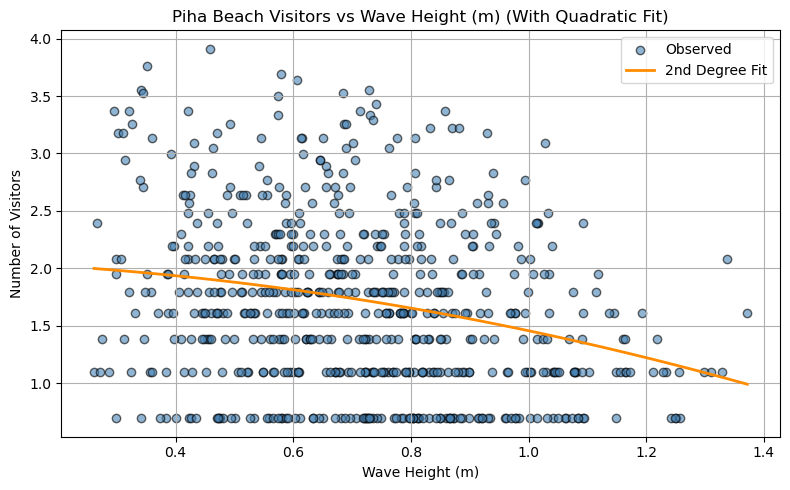

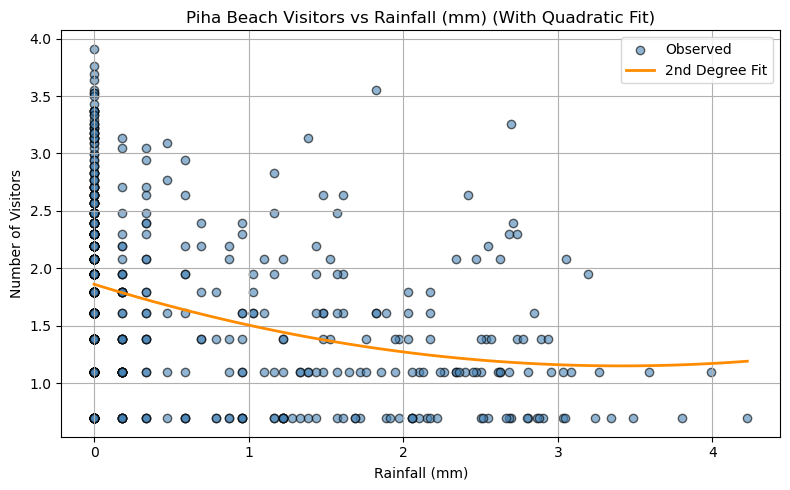

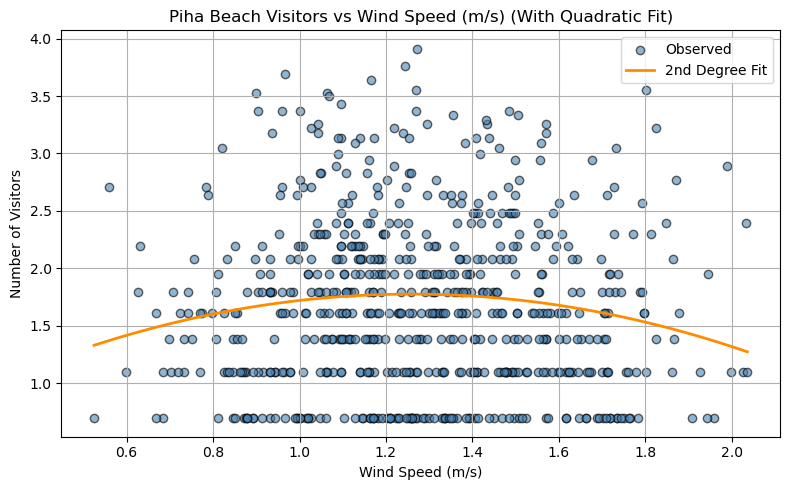

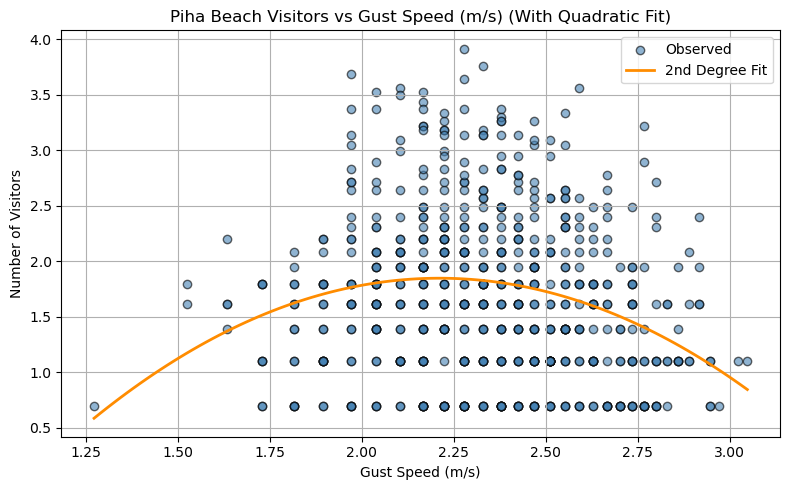

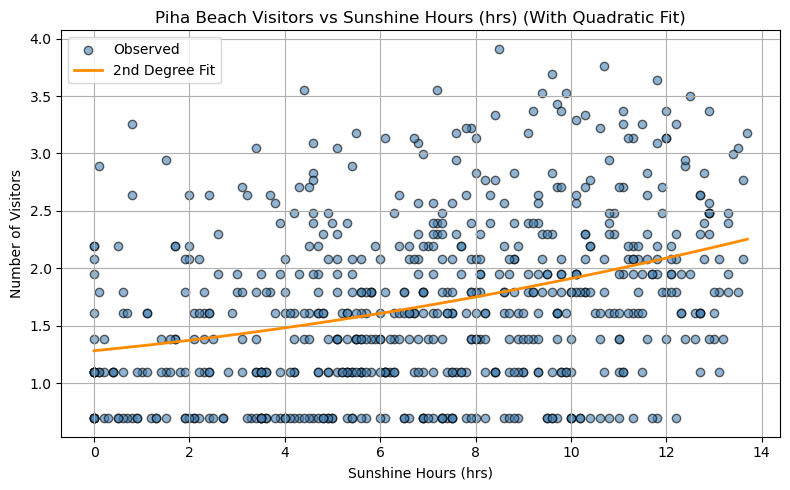

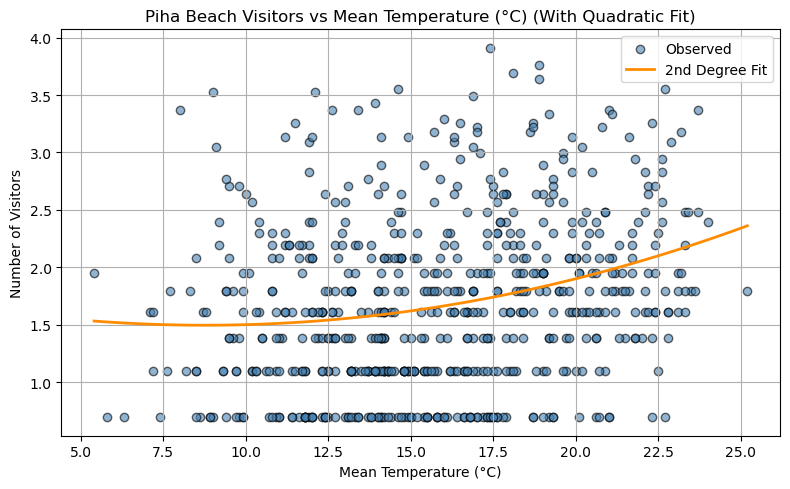

In [ ]:


weather_vars = [
    ("log_wave_height", "Wave Height (m)"),
    ("log_rainfall", "Rainfall (mm)"),
    ("log_wind_speed", "Wind Speed (m/s)"),
    ("log_gust_speed", "Gust Speed (m/s)"),
    ("daily_sunshine_hours", "Sunshine Hours (hrs)"),
    ("daily_mean_temp", "Mean Temperature (°C)"),
]

#  Plotting each weather variable against log-transformed visitors count
for col, label in weather_vars:
    x = df_merged[col].values
    y = df_merged["log_visitors"].values

    #  Clean NaN values
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    #  Fit a 2nd degree polynomial
    coeffs = np.polyfit(x_clean, y_clean, 2)
    poly_func = np.poly1d(coeffs)
    x_fit = np.linspace(np.min(x_clean), np.max(x_clean), 100)
    y_fit = poly_func(x_fit)

    #  Plotting
    plt.figure(figsize=(8, 5))
    plt.scatter(x_clean, y_clean, color='steelblue', alpha=0.6, edgecolor='k', label='Observed')
    plt.plot(x_fit, y_fit, color='darkorange', linewidth=2, label='2nd Degree Fit')
    plt.title(f"Piha Beach Visitors vs {label} (With Quadratic Fit)")
    plt.xlabel(label)
    plt.ylabel("Number of Visitors")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

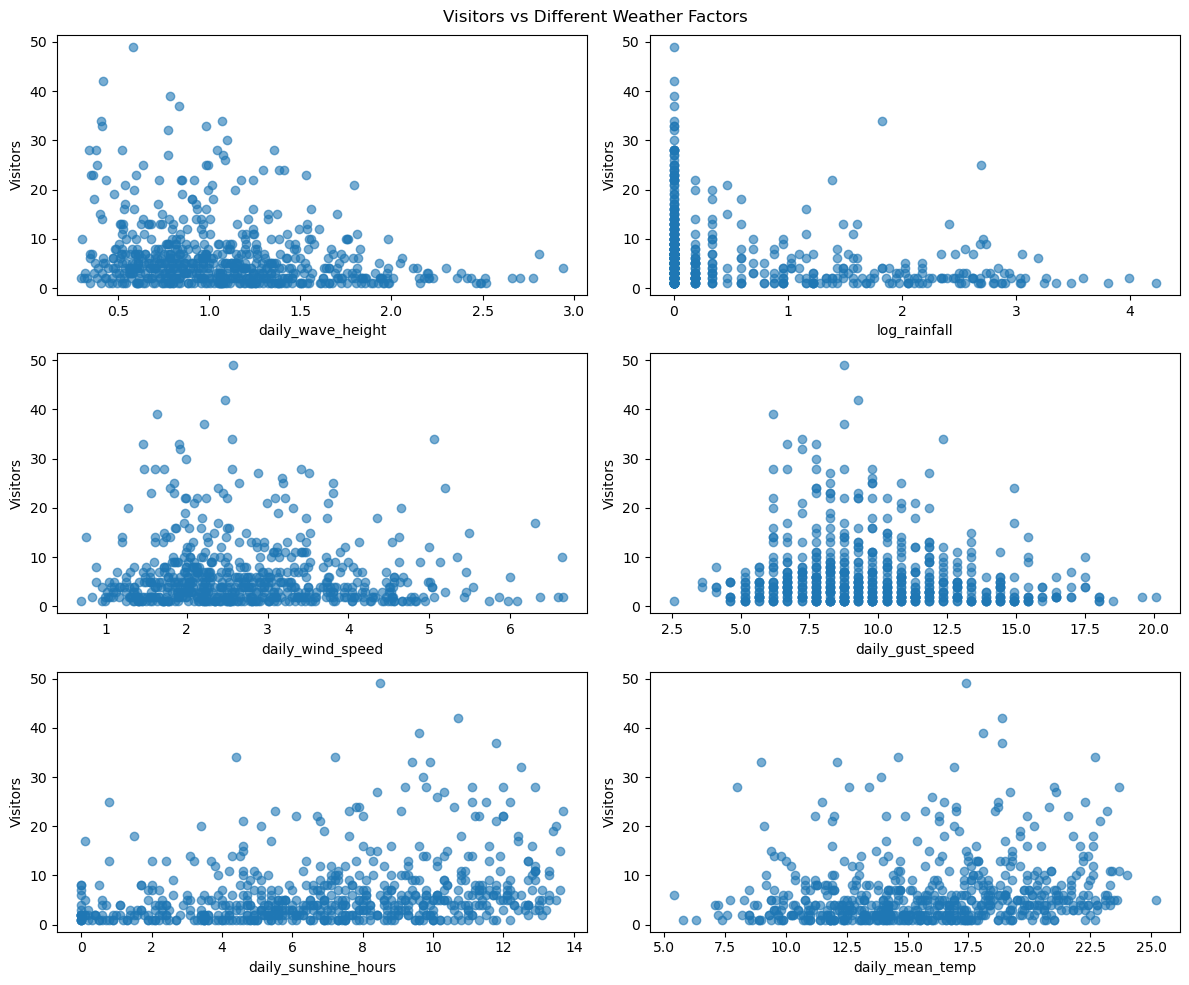

In [27]:
fig, axs = plt.subplots(3, 2, figsize=(12,10))
weather_vars = ["daily_wave_height", "log_rainfall", "daily_wind_speed", "daily_gust_speed", "daily_sunshine_hours", "daily_mean_temp"]

for i, var in enumerate(weather_vars):
    row, col = divmod(i, 2)
    axs[row, col].scatter(df_merged[var], df_merged["daily_piha_beach_visitors"], alpha=0.6)
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel("Visitors")

plt.suptitle("Visitors vs Different Weather Factors")
plt.tight_layout()
plt.show()

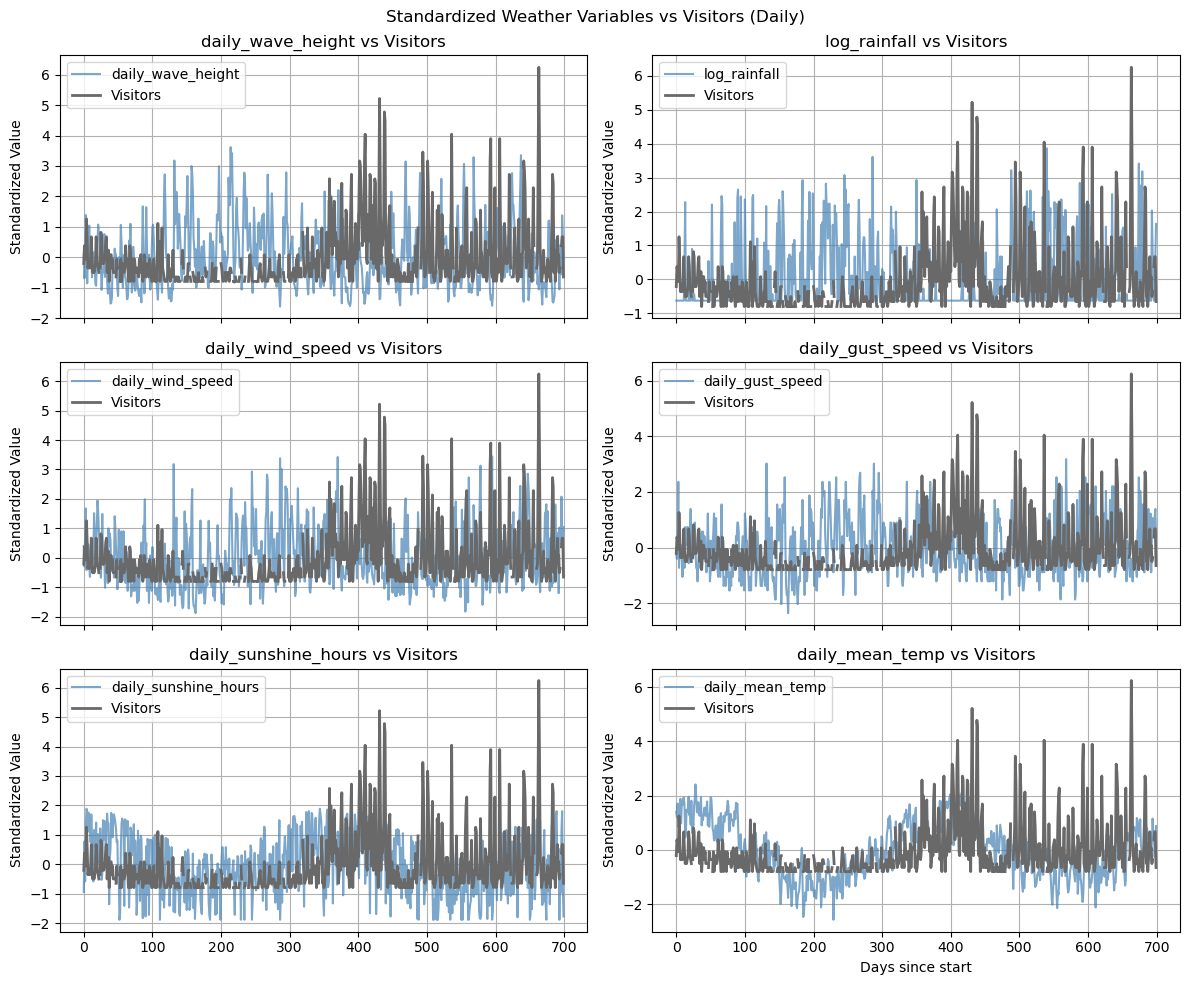

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 假设df_merged已经有这几列：
cols = ["daily_wave_height", "log_rainfall", "daily_wind_speed", "daily_gust_speed", "daily_sunshine_hours", "daily_mean_temp", "daily_piha_beach_visitors"]

# 标准化
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_merged[cols]), columns=cols)

# 开始画6个子图
fig, axs = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

weather_vars = cols[:-1]  # 6个weather变量，不包含Visitors

for i, var in enumerate(weather_vars):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    # 绘制该变量与Visitors的折线
    ax.plot(df_scaled.index, df_scaled[var], label=var, color='steelblue', alpha=0.7)
    ax.plot(df_scaled.index, df_scaled["daily_piha_beach_visitors"], label='Visitors', color='dimgray', linewidth=2)

    ax.set_title(f"{var} vs Visitors")
    ax.set_ylabel("Standardized Value")
    ax.grid(True)
    ax.legend()

plt.suptitle("Standardized Weather Variables vs Visitors (Daily)")
plt.xlabel("Days since start")
plt.tight_layout()

plt.show()




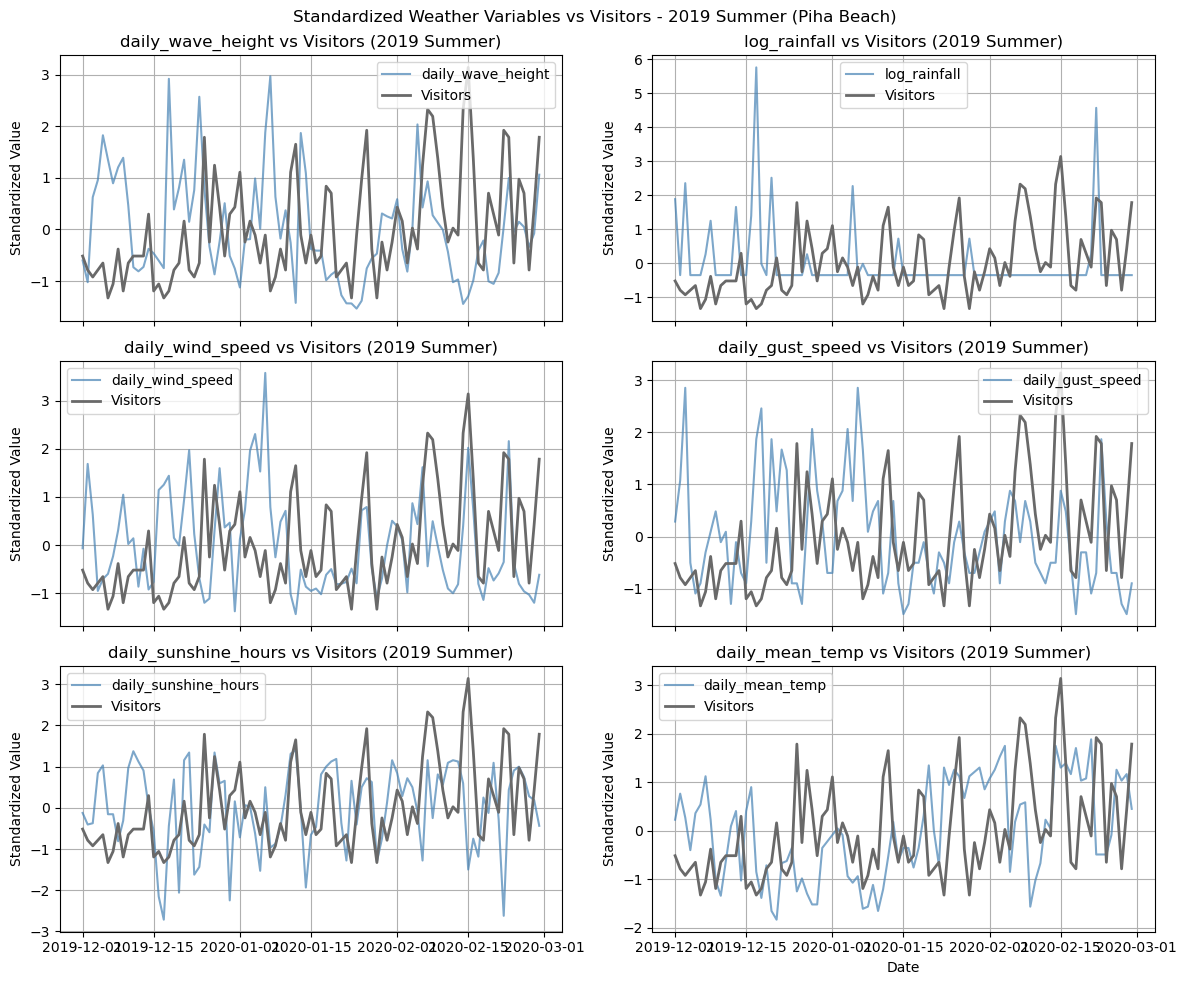

In [57]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd


# 假设df_merged已经有这些列：
cols = ["daily_wave_height", "log_rainfall", "daily_wind_speed", "daily_gust_speed", "daily_sunshine_hours", "daily_mean_temp", "daily_piha_beach_visitors"]

# 1. 筛选2019年夏季：2019-12-01 到 2020-02-29
df_merged["date"] = pd.to_datetime(df_merged["date"])
summer_df = df_merged[(df_merged["date"] >= "2019-12-01") & (df_merged["date"] <= "2020-02-29")].copy()

summer_df["date"] = pd.to_datetime(summer_df["date"])
date_col = summer_df["date"]

# 标准化
scaler = StandardScaler()
scaled_values = scaler.fit_transform(summer_df[cols])
df_scaled = pd.DataFrame(scaled_values, columns=cols)

# 把日期加回来并设置为index
df_scaled["date"] = date_col.values
df_scaled.set_index("date", inplace=True)

# print(df_scaled.head())
# print(df_scaled.tail())
# print(summer_df.head())
# print(summer_df.tail())


# 3. 开始画6个子图
fig, axs = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

weather_vars = cols[:-1]  # 除了Visitors

for i, var in enumerate(weather_vars):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    ax.plot(df_scaled.index, df_scaled[var], label=var, color='steelblue', alpha=0.7)
    ax.plot(df_scaled.index, df_scaled["daily_piha_beach_visitors"], label='Visitors', color='dimgray', linewidth=2)

    ax.set_title(f"{var} vs Visitors (2019 Summer)")
    ax.set_ylabel("Standardized Value")
    ax.grid(True)
    ax.legend()

plt.suptitle("Standardized Weather Variables vs Visitors - 2019 Summer (Piha Beach)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

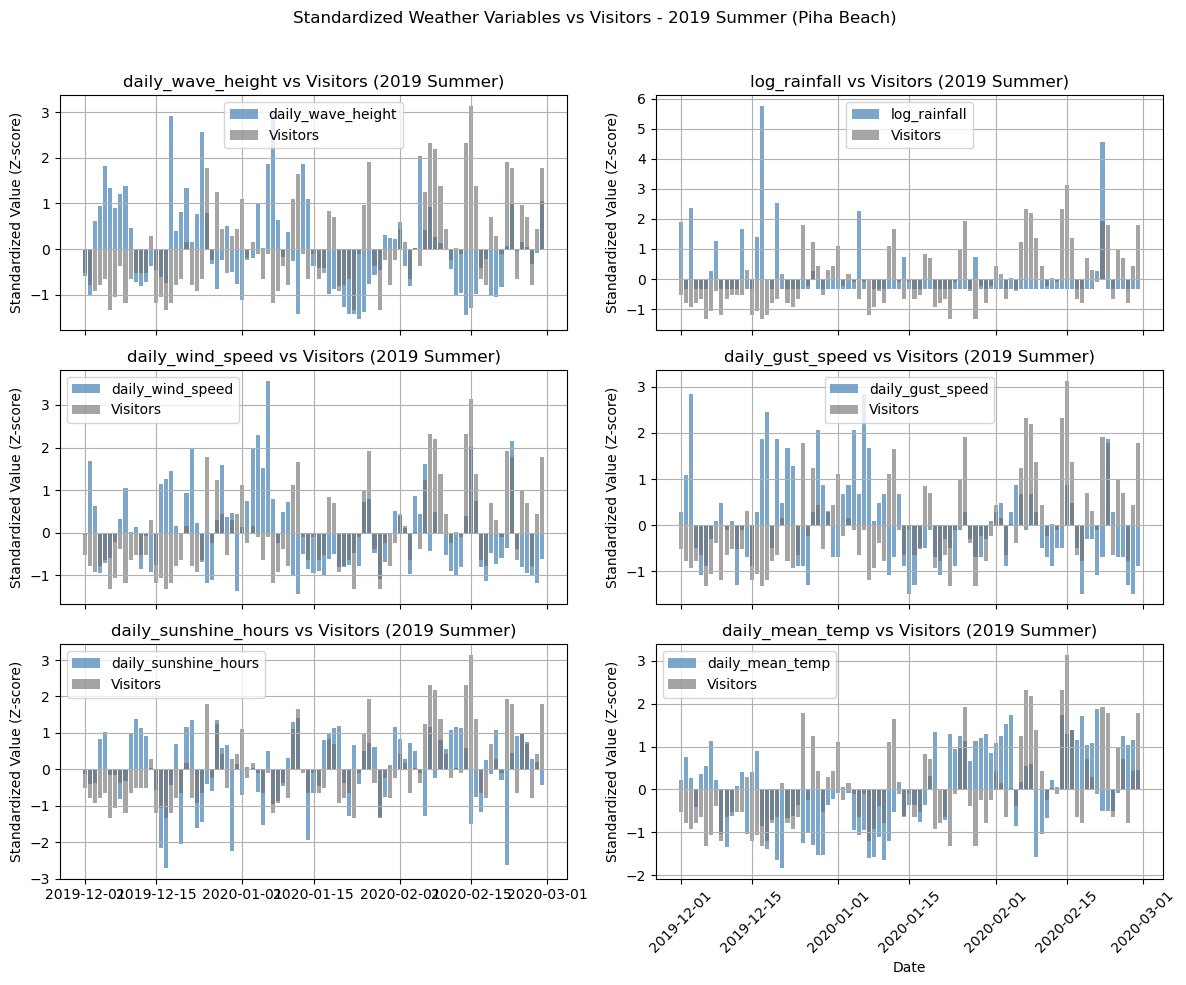

In [ ]:


fig, axs = plt.subplots(3, 2, figsize=(12, 10), sharex=True)

weather_vars = cols[:-1]  # 除了Visitors

for i, var in enumerate(weather_vars):
    row, col = divmod(i, 2)
    ax = axs[row, col]

    # 绘制weather变量柱状图（蓝色）
    ax.bar(df_scaled.index, df_scaled[var], label=var, color='steelblue', alpha=0.7)

    # 绘制游客人数柱状图（灰色）
    ax.bar(df_scaled.index, df_scaled["daily_piha_beach_visitors"], label='Visitors', color='dimgray', alpha=0.6)

    ax.set_title(f"{var} vs Visitors (2019 Summer)")
    ax.set_ylabel("Standardized Value (Z-score)")
    ax.grid(True)
    ax.legend()

# 总标题
plt.suptitle("Standardized Weather Variables vs Visitors - 2019 Summer (Piha Beach)")

# x轴日期格式
plt.xlabel("Date")
plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # 给总标题留空间
plt.show()

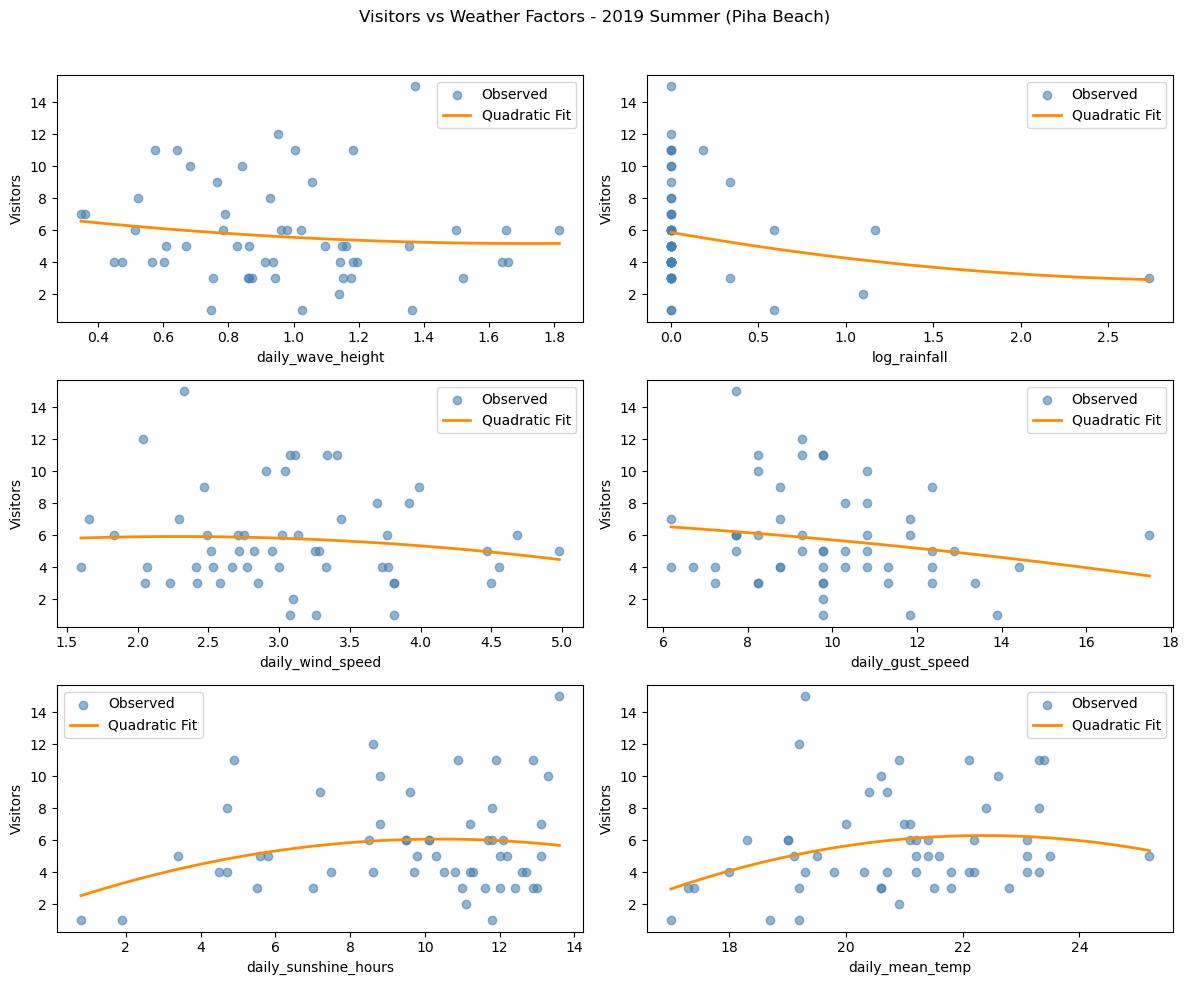

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# 筛选2019夏季：2018-12-01 到 2019-02-28
df_merged["date"] = pd.to_datetime(df_merged["date"])
df_summer = df_merged[(df_merged["date"] >= "2018-12-01") & (df_merged["date"] <= "2019-02-28")].copy()

# 要分析的气象变量
weather_vars = ["daily_wave_height", "log_rainfall", "daily_wind_speed", "daily_gust_speed", "daily_sunshine_hours", "daily_mean_temp"]

fig, axs = plt.subplots(3, 2, figsize=(12, 10))

for i, var in enumerate(weather_vars):
    row, col = divmod(i, 2)
    x = df_summer[var].values
    y = df_summer["daily_piha_beach_visitors"].values

    # 删除缺失值
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    # 散点图：无黑边
    axs[row, col].scatter(x_clean, y_clean, alpha=0.6, color='steelblue', label='Observed')

    # 二次多项式拟合
    coeffs = np.polyfit(x_clean, y_clean, 2)
    poly_func = np.poly1d(coeffs)
    x_fit = np.linspace(np.min(x_clean), np.max(x_clean), 100)
    y_fit = poly_func(x_fit)

    axs[row, col].plot(x_fit, y_fit, color='darkorange', linewidth=2, label='Quadratic Fit')

    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel("Visitors")
    # 取消网格线
    axs[row, col].legend()

plt.suptitle("Visitors vs Weather Factors - 2019 Summer (Piha Beach)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


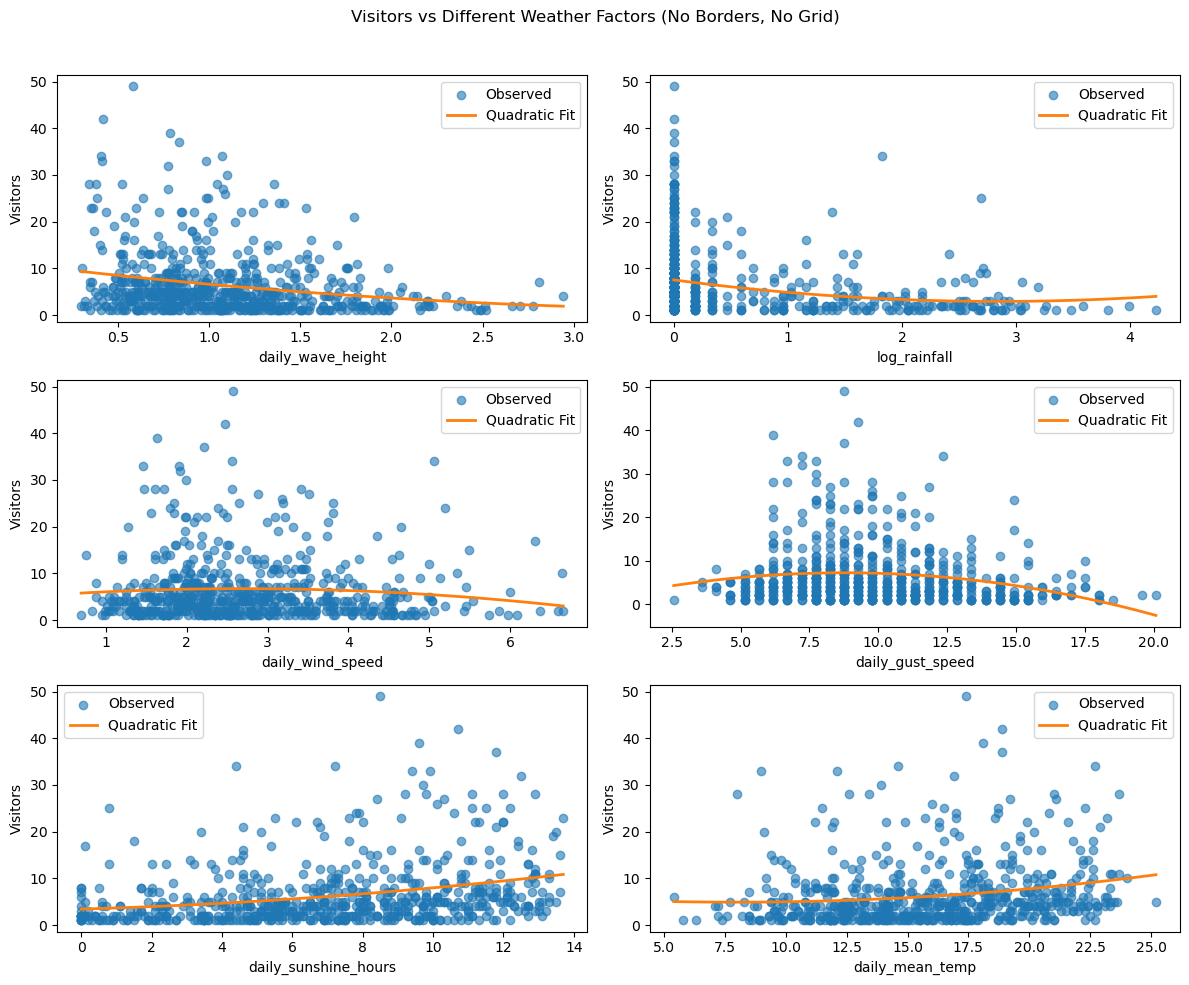

In [63]:
import numpy as np
import matplotlib.pyplot as plt


fig, axs = plt.subplots(3, 2, figsize=(12, 10))
weather_vars = ["daily_wave_height", "log_rainfall", "daily_wind_speed", "daily_gust_speed", "daily_sunshine_hours", "daily_mean_temp"]

scatter_color = '#1f77b4'    # 蓝色
fit_line_color = '#ff7f0e'    # 橙色

for i, var in enumerate(weather_vars):
    row, col = divmod(i, 2)
    x = df_merged[var].values
    y = df_merged["daily_piha_beach_visitors"].values

    # 去除缺失
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    # 散点图：纯蓝色，无边框
    axs[row, col].scatter(x_clean, y_clean, alpha=0.6, color=scatter_color, label='Observed')

    # 二次拟合曲线
    coeffs = np.polyfit(x_clean, y_clean, 2)
    poly_func = np.poly1d(coeffs)
    x_fit = np.linspace(np.min(x_clean), np.max(x_clean), 100)
    y_fit = poly_func(x_fit)
    axs[row, col].plot(x_fit, y_fit, color=fit_line_color, linewidth=2, label='Quadratic Fit')

    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel("Visitors")
    axs[row, col].legend()

plt.suptitle("Visitors vs Different Weather Factors (No Borders, No Grid)")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()